  show_id     type    title director            cast         country  \
0      s1    Movie  Movie A    Dir A  Actor1, Actor2   United States   
1      s2  TV Show   Show B    Dir B  Actor3, Actor4           India   
2      s3    Movie  Movie C    Dir C          Actor5  United Kingdom   
3      s4    Movie  Movie D    Dir D  Actor6, Actor7            <NA>   
4      s5  TV Show   Show E     <NA>          Actor8           India   

          date_added  release_year rating   duration           listed_in  \
0  September 9, 2019          2019     PG     90 min              Dramas   
1    January 1, 2020          2020  TV-MA  2 Seasons            Comedies   
2       June 6, 2021          2021  PG-13     95 min  Action & Adventure   
3       July 4, 2018          2018      R    100 min              Dramas   
4      March 1, 2022          2022  TV-14  3 Seasons            Comedies   

               description  
0        A dramatic movie.  
1         A funny TV show.  
2     Action-packed mov

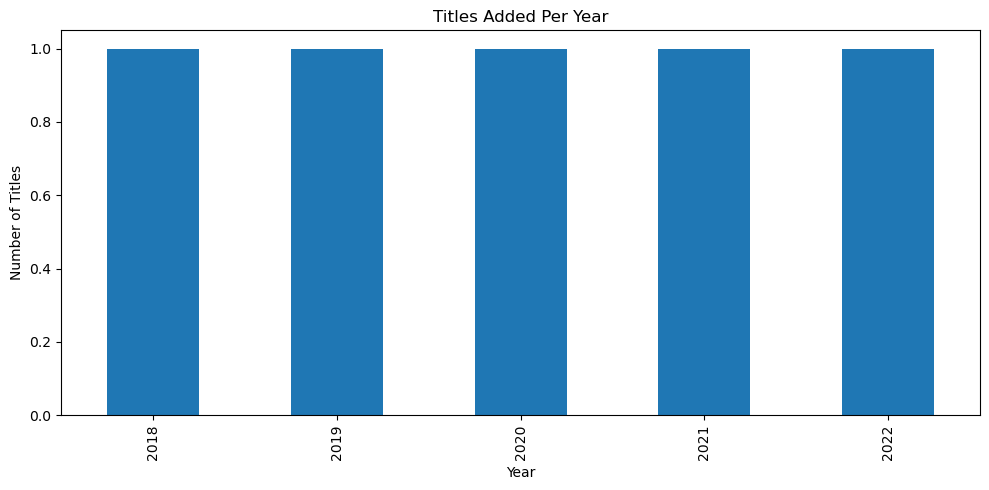

In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Load large dataset using Dask
df = dd.read_csv("netflix_titles.csv")

# Show first few rows
print(df.head())

# Total number of records
print("Total records:", df.shape[0].compute())

# Number of Movies vs TV Shows
type_counts = df['type'].value_counts().compute()
print("\nContent Type Counts:\n", type_counts)

# Top 10 countries by content
top_countries = df['country'].value_counts().nlargest(10).compute()
print("\nTop 10 Countries:\n", top_countries)

# Most common genres
top_genres = df['listed_in'].value_counts().nlargest(10).compute()
print("\nTop Genres:\n", top_genres)

# Titles added per year
df['date_added'] = dd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
year_counts = df['year_added'].value_counts().compute().sort_index()
print("\nTitles Added by Year:\n", year_counts)

# Optional: Plot titles added per year
year_counts.plot(kind='bar', title='Titles Added Per Year', figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()
